# TFG: Network properties of Informal Support Networks in Mental Health

Oriol Martinez Perez

We will work with data set https://zenodo.org/record/7443141 that was created within the CoAct project (as described there). The data is stored in folder data/ within the same folder as this jupyter notebook. 

## 0. Notebook setup

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import itertools

In [2]:
TYPE_C_PATH = "./data/Answers_to_Microstories/answers_stories_C.pkl"
SOCIODEMOGRAPHIC_PATH = "./data/Sociodemographic_survey/answers_sociodemographic_survey.pkl"

## 1. Load some data

We will work with python, and more specifically with python pandas.

First, we load the answers of the participants to stories type C (See documentation on Zenodo, https://zenodo.org/record/7443141)

In [3]:
df_C = pd.read_pickle(TYPE_C_PATH)
df_C

0       capacitation_Teatre_Amigues                                          \
1                              yo_1  yo_2 yo_final otro_1 otro_2 otro_final   
f91cb3f                           B  None        B      C   None          C   
65fc038                           C  None        C      C   None          C   
5a20153                           C  None        C      C   None          C   
9f4d288                           C  None        C      C   None          C   
a1efa63                           A  None        A      B   None          B   
...                             ...   ...      ...    ...    ...        ...   
024f546                           C  None        C      C   None          C   
190aebe                        None  None     None   None   None       None   
4a92bfd                           C  None        C      C   None          C   
388a24f                           C  None        C      C   None          C   
c2d349a                        None  None     None   None   None       None   

0       Obrir_camí                        ... Incomprensió_1             \
1             yo_1  yo_2 yo_final otro_1  ...         otro_2 otro_final   
f91cb3f          A  None        A      C  ...           None       None   
65fc038       None  None     None   None  ...           None       None   
5a20153          A  None        A      A  ...           None       None   
9f4d288          A  None        A      A  ...           None       None   
a1efa63          A  None        A      A  ...           None       None   
...            ...   ...      ...    ...  ...            ...        ...   
024f546       None  None     None   None  ...           None       None   
190aebe       None  None     None   None  ...           None       None   
4a92bfd          C  None        C      C  ...           None       None   
388a24f       None  None     None   None  ...           None       None   
c2d349a       None  None     None   None  ...           None       None   

0       Por_situacions_socials                             \
1                         yo_1 yo_final otro_1 otro_final   
f91cb3f                   None     None   None       None   
65fc038                   None     None   None       None   
5a20153                   None     None   None       None   
9f4d288                   None     None   None       None   
a1efa63                   None     None   None       None   
...                        ...      ...    ...        ...   
024f546                   None     None   None       None   
190aebe                   None     None   None       None   
4a92bfd                   None     None   None       None   
388a24f                   None     None   None       None   
c2d349a                   None     None   None       None   

0       Reconeixement_comprensio                             
1                           yo_1 yo_final otro_1 otro_final  
f91cb3f                     None     None   None       None  
65fc038                     None     None   None       None  
5a20153                     None     None   None       None  
9f4d288                     None     None   None       None  
a1efa63                     None     None   None       None  
...                          ...      ...    ...        ...  
024f546                     None     None   None       None  
190aebe                     None     None   None       None  
4a92bfd                     None     None   None       None  
388a24f                     None     None   None       None  
c2d349a                     None     None   None       None  

[748 rows x 706 columns]

The DataFrame we loaded is a pandas MultiIndex DataFrame. We are not interested in there intermediate decisions, but only in the FINAL decisions of the participants, so we reduce the DataFrame to columns yo_final and otro_final. Particularly, we create two DataFrames with only these columns.

In [4]:
df_C.columns= df_C.columns.swaplevel(0,1)
df_C_yo   = df_C.yo_final
df_C_otro = df_C.otro_final
df_C.columns= df_C.columns.swaplevel(0,1)

df_C_yo.head(5)

,capacitation_Teatre_Amigues,Obrir_camí,Experiencia_aprenentatge,Gossos,Sanglotant,Empatia_comprensio,Encuentrobis,Ataque_ansiedad_b,Temps_aprendre,Bipolar,...,Joys_motherhood_2,Esperança,Al·lucinacions,Escoltar_temps,Germans,Suport,Realitat_ficció,Incomprensió_1,Por_situacions_socials,Reconeixement_comprensio
f91cb3f,B,A,A,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
65fc038,C,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5a20153,C,A,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9f4d288,C,A,B,C,B,A,B,C,B,None,...,None,None,None,None,None,None,None,None,None,None
a1efa63,A,A,B,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Secondly, we also load the answers of the (same) participants to the sociodemographic survey (columns documented in ./data/Sociodemographic_survey/meta_data_answers.pdf):

In [5]:
df_sociodem = pd.read_pickle(SOCIODEMOGRAPHIC_PATH)
df_sociodem

1,genere,edat,pp,pp_v,pp_v_g,pp_bf,pp_bef,pp_bel,pp_bev,pp_bec,...,p_ac_si,p_g1,p_g2,p_ass,p_prof,p_prof_si,country_alpha2,urban_rural,is_in_Catalonia,language
f91cb3f,f,4,Sí,Sí,a,m,a,a,b,b,...,None,b,m,Sí,No,None,US,None,False,en
65fc038,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,False,ca
5a20153,f,3,No,None,None,None,None,None,None,None,...,None,a,a,Sí,No,None,ES,urban,True,ca
9f4d288,m,4,No,None,None,None,None,None,None,None,...,None,b,b,Sí,Sí,apasa,ES,urban,True,ca
a1efa63,f,2,Sí,Sí,nsdmp,b,m,nsdmp,nvr,nvr,...,nvr,a,m,No,nvr,None,ES,None,False,es
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
024f546,f,1,Sí,Sí,a,m,a,nt,nsdmp,m,...,None,b,m,Sí,Sí,psm,ES,urban,True,ca
190aebe,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,False,ca
4a92bfd,m,4,Sí,Sí,m,m,b,nsdmp,nsdmp,nsdmp,...,None,a,None,No,No,None,ES,None,False,es
388a24f,f,4,Sí,Sí,a,a,a,m,b,b,...,None,a,None,None,None,None,ES,urban,True,ca


### 1.1. Dataframe exploration

In [6]:
df_C_yo.describe()

,capacitation_Teatre_Amigues,Obrir_camí,Experiencia_aprenentatge,Gossos,Sanglotant,Empatia_comprensio,Encuentrobis,Ataque_ansiedad_b,Temps_aprendre,Bipolar,...,Joys_motherhood_2,Esperança,Al·lucinacions,Escoltar_temps,Germans,Suport,Realitat_ficció,Incomprensió_1,Por_situacions_socials,Reconeixement_comprensio
count,580,399,361,332,298,281,248,238,225,204,...,21,21,21,21,20,20,20,20,20,19
unique,3,3,3,3,3,3,3,3,3,3,...,3,3,2,3,3,3,3,3,3,3
top,C,A,A,C,C,B,B,B,A,B,...,C,C,C,C,C,C,C,C,C,C
freq,391,280,152,183,203,120,87,96,104,86,...,13,14,16,9,14,11,12,12,9,11


In [7]:
df_C_yo.isna().sum()

0
capacitation_Teatre_Amigues    168
Obrir_camí                     349
Experiencia_aprenentatge       387
Gossos                         416
Sanglotant                     450
                              ... 
Suport                         728
Realitat_ficció                728
Incomprensió_1                 728
Por_situacions_socials         728
Reconeixement_comprensio       729
Length: 130, dtype: int64

**TASK**: Find out how many women and how many man are in the sample.

In [18]:
df_sociodem['genere'].value_counts()

f      366
m      155
d       11
nvr      3
Name: genere, dtype: int64

In [7]:
df_sociodem[df_sociodem['genere'] == 'f']

1,genere,edat,pp,pp_v,pp_v_g,pp_bf,pp_bef,pp_bel,pp_bev,pp_bec,...,p_ac_si,p_g1,p_g2,p_ass,p_prof,p_prof_si,country_alpha2,urban_rural,is_in_Catalonia,language
f91cb3f,f,4,Sí,Sí,a,m,a,a,b,b,...,None,b,m,Sí,No,None,US,None,False,en
5a20153,f,3,No,None,None,None,None,None,None,None,...,None,a,a,Sí,No,None,ES,urban,True,ca
a1efa63,f,2,Sí,Sí,nsdmp,b,m,nsdmp,nvr,nvr,...,nvr,a,m,No,nvr,None,ES,None,False,es
f0d3a29,f,2,Sí,Sí,b,nsdmp,b,nvr,b,b,...,m,m,b,Sí,nvr,None,ES,None,False,es
9846ca8,f,4,Sí,Sí,b,a,a,b,b,m,...,None,a,a,No,Sí,a,ES,None,False,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145d339,f,5,Sí,Sí,m,nsdmp,m,nsdmp,nsdmp,nsdmp,...,None,b,b,No,No,None,ES,urban,True,ca
c97639e,f,4,No,None,None,None,None,None,None,None,...,None,a,b,Sí,Sí,psm,ES,urban,True,ca
0fd9ca7,f,4,No,None,None,None,None,None,None,None,...,None,b,b,No,Sí,apasa,ES,rural,True,es
024f546,f,1,Sí,Sí,a,m,a,nt,nsdmp,m,...,None,b,m,Sí,Sí,psm,ES,urban,True,ca


In [8]:
df_sociodem['genere'] == 'f'

f91cb3f     True
65fc038    False
5a20153     True
9f4d288    False
a1efa63     True
           ...  
024f546     True
190aebe    False
4a92bfd    False
388a24f     True
c2d349a    False
Name: genere, Length: 748, dtype: bool

In [19]:
df_sociodem['country_alpha2'].value_counts()

ES    463
US     17
DE     12
MX      3
AT      3
AR      3
FI      2
BE      2
PT      2
IL      1
CH      1
FR      1
IT      1
CA      1
Name: country_alpha2, dtype: int64

In [20]:
df_sociodem.describe()

1,genere,edat,pp,pp_v,pp_v_g,pp_bf,pp_bef,pp_bel,pp_bev,pp_bec,...,p_ac_si,p_g1,p_g2,p_ass,p_prof,p_prof_si,country_alpha2,urban_rural,is_in_Catalonia,language
count,535,532,508,385,312,382,382,381,381,380,...,162,479,446,473,472,131,512,393,748,748
unique,4,7,3,3,5,5,5,6,5,5,...,4,4,4,3,3,4,14,2,2,4
top,f,4,Sí,Sí,a,a,m,nsdmp,nsdmp,nsdmp,...,m,m,m,No,No,psm,ES,urban,True,ca
freq,366,158,386,313,176,113,134,105,252,174,...,71,188,184,242,322,42,463,321,393,493


## 2. Graph creation

Get a subset of the stories that has at least 50 participants

In [8]:
subset_df = df_C_yo.loc[:, df_C_yo.count() > 3]
subset_df

,capacitation_Teatre_Amigues,Obrir_camí,Experiencia_aprenentatge,Gossos,Sanglotant,Empatia_comprensio,Encuentrobis,Ataque_ansiedad_b,Temps_aprendre,Bipolar,...,Joys_motherhood_2,Esperança,Al·lucinacions,Escoltar_temps,Germans,Suport,Realitat_ficció,Incomprensió_1,Por_situacions_socials,Reconeixement_comprensio
f91cb3f,B,A,A,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
65fc038,C,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5a20153,C,A,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9f4d288,C,A,B,C,B,A,B,C,B,None,...,None,None,None,None,None,None,None,None,None,None
a1efa63,A,A,B,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
024f546,C,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
190aebe,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4a92bfd,C,C,A,C,C,A,C,None,None,None,...,None,None,None,None,None,None,None,None,None,None
388a24f,C,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Drop participants that did not answer all stories

In [9]:
subset_df = subset_df.dropna(how='any')
subset_df.shape

(19, 130)

In [8]:
# df_C_yo.T[df_C_yo.count() > 50].T

In [9]:
# N_pa = 50 
# subset_df = df_C_yo.T[df_C_yo.count() > N_pa].T
# stories = (df_C_yo.columns)
# subset_df

Generate dict which contains a list of 3-tuples for each story

In [36]:
def weight(ans1, ans2):
    """
    Computes weight of the edge that connects participant i and j
    """
    weight = 0
    if ans1 == 'A':
        if ans2 == 'A':
            weight = 1
        elif ans2 == 'B':
            weight = 2/3
    elif ans1 == 'B':
        if ans2 == 'A':
            weight = 2/3
        elif ans2 == 'B':
            weight = 1/3
    
    return weight

In [10]:
a = subset_df['Obrir_camí']

In [19]:
print(a.index)

Index(['4e53c5c', 'bd4b2f4', 'aa07d95', 'db7d9c3', '6bac72b', '962a7dd',
       '446ad6c', '693ef79', '8ec15bc', '41f2447', '34d8485', '49db8c4',
       'c4bba29', '1a8e45b', '6e93efd', 'c94e42e', '7a35b75', '6568ea1',
       '2f5762a', '62447b9', '2541155', '7b3c431', '52d61f6', 'd91bf84',
       '8c74aa5', 'ac6f3f6', '2dffb9e', '7636563', 'c899adb', '1117a63',
       '7d9c3_1', 'fc2538d', 'bf983ba', '79868cd', '20f3e2e', '99775ba',
       '619e952', 'ea8c0d6', '374ecf8', 'dee5269', '43c977d', '4c228f6',
       '844fef2', 'e1b193b', 'e98cdcd', '518e9b8', '1883ca0', '37b9a9f',
       'f9b9236', '7cf831f', '152aa4d', '145d339'],
      dtype='object')


In [28]:
b = itertools.combinations(a.index, 2)
b1 = itertools.combinations(a, 2)

In [34]:
a1 = subset_df
a2 = itertools.combinations(a1.index, 2)

In [35]:
count = 0
for c in a2:
    count += 1
print(count, c)

1326 ('152aa4d', '145d339')


In [29]:
print(type(b))
count = 0
for c in b:
    count += 1
for c1 in b1:
    pass
print(count)
print(c, c1)

<class 'itertools.combinations'>
1326
('152aa4d', '145d339') ('A', 'A')


In [44]:
indexs_pairs = itertools.combinations(subset_df.index, 2)

edge_weights = []
for pair in indexs_pairs:
    pair_weights = [weight(subset_df.loc[pair[0]][column], subset_df.loc[pair[1]][column]) for column in subset_df.columns]
    avg_weight = np.mean(pair_weights)
    edge_weights.append((pair[0], pair[1], avg_weight))

In [46]:
print(len(edge_weights))

1326


In [11]:
elist_yo = {}
story_count = 1
for column in subset_df.columns:
    print(f'Computing weights for story number {story_count}: {column}...')
    
    elist_yo[column] = []
    for i, id1 in enumerate(subset_df.index):
        for j, id2 in enumerate(subset_df.index):
            if j > i:
                pair = [id1, id2, weight(subset_df[column][id1], subset_df[column][id2])]
                elist_yo[column].append(pair)
    story_count += 1
print('Weights computation complete!')

Computing weights for story number 1: capacitation_Teatre_Amigues...
Computing weights for story number 2: Obrir_camí...
Computing weights for story number 3: Experiencia_aprenentatge...
Computing weights for story number 4: Gossos...
Computing weights for story number 5: Sanglotant...
Computing weights for story number 6: Empatia_comprensio...
Computing weights for story number 7: Encuentrobis...
Computing weights for story number 8: Ataque_ansiedad_b...
Computing weights for story number 9: Temps_aprendre...
Computing weights for story number 10: Bipolar...
Computing weights for story number 11: Ajuda_doble...
Computing weights for story number 12: Diagnostic_decepcio...
Computing weights for story number 13: Acceptació_vergonya...
Computing weights for story number 14: Cultura...
Computing weights for story number 15: Ocultacio_compartir...
Computing weights for story number 16: Ingresada...
Computing weights for story number 17: Masclisme_estereotips...
Computing weights for story 

In [12]:
# Chech we compute the weights for all indexes. The len of a list should be ( participants! ) /( (participants-2)! * 2! )
if len(elist_yo['capacitation_Teatre_Amigues']) == 1326: # 52!/(50! * 2!) is 1326
    print('Correct computation')
else: 
    print('Something went wrong')

Correct computation


Compute the average weight for each pair of nodes among all stories. To do so, we pass the dict of lists as a numpy array

In [13]:
sample_key = list(elist_yo.keys())[0]
weights_matrix = np.empty((len(elist_yo), len(elist_yo[sample_key])))
weights_matrix.shape

(68, 1326)

In [29]:
for i, story in enumerate(elist_yo):
    for j, pair in enumerate(elist_yo[story]):
        weights_matrix[i-1][j-1] = pair[2]
        
weights_matrix

array([[0.66666667, 0.33333333, 0.66666667, ..., 1.        , 1.        ,
        0.66666667],
       [1.        , 0.        , 1.        , ..., 0.33333333, 0.33333333,
        1.        ],
       [0.        , 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.66666667, 0.        , 0.66666667, ..., 0.66666667, 0.33333333,
        1.        ],
       [1.        , 0.        , 0.66666667, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
avg_weights = np.mean(weights_matrix, axis=0)
len(avg_weights)
avg_weights

array([0.3627451 , 0.19117647, 0.25490196, ..., 0.23039216, 0.12254902,
       0.45098039])

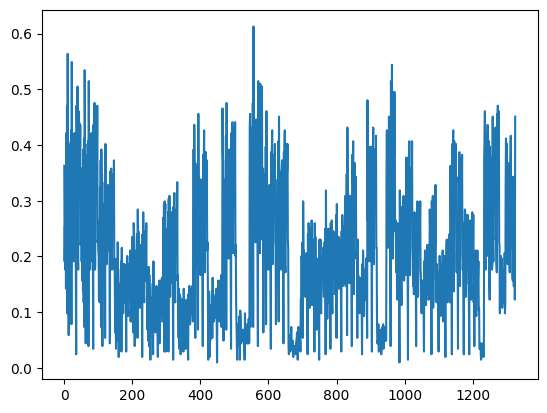

In [36]:
plt.plot(avg_weights)

Get a list with all nodes pair and their avg weight

In [31]:
avg_list = []
for i, pair in enumerate(elist_yo[sample_key]):
    avg_list.append((pair[0], pair[1], avg_weights[i]))

In [32]:
print(len(avg_list))

1326


In [33]:
G = nx.Graph()
G.add_weighted_edges_from(avg_list)

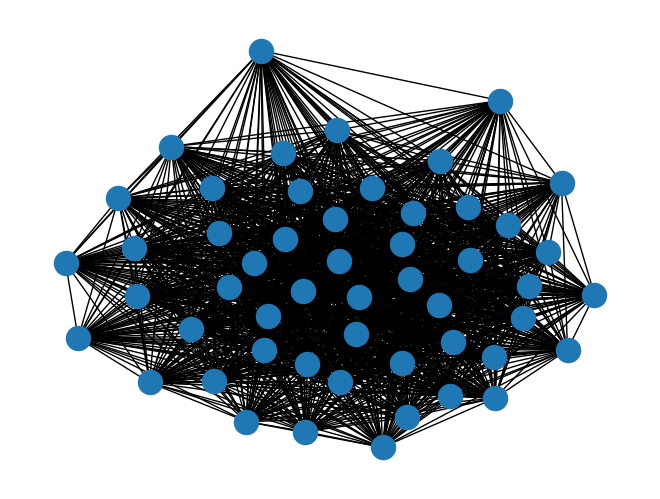

In [34]:
nx.draw(G)

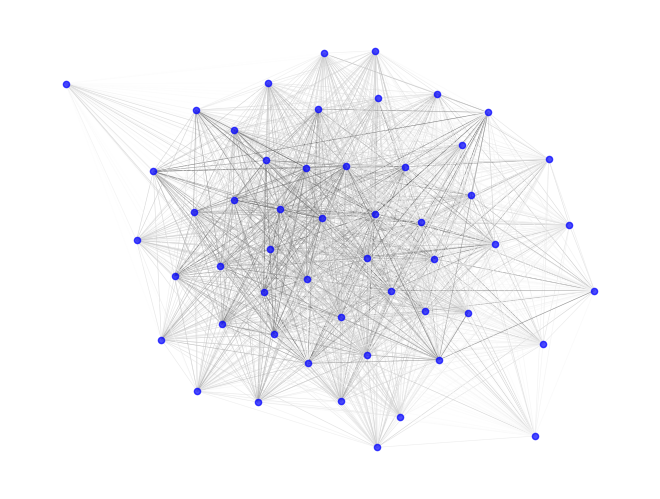

In [35]:
from matplotlib import pyplot as plt 
cmap = plt.cm.Greys # edge colors
nx.draw(G, 
        pos= nx.spring_layout(G, k=1, iterations=100), # try also nx.spectral_layout(G)
        edge_color=np.real([*nx.get_edge_attributes(G, 'weight').values()]), 
        width=0.4, 
        edge_cmap=cmap, 
        node_color="blue",# this is the point where we can later plot one group red and the other blue
        alpha=0.7,
        node_size=20, 
        with_labels = False, 
        font_weight ="bold", 
        font_color="w")

0     15.617647
1     14.862745
2     12.333333
3      7.156863
4      8.666667
5      6.073529
6      9.823529
7      6.220588
8     12.446078
9      7.019608
10    12.392157
11     6.436275
12    15.901961
13    13.549020
14    10.759804
15     4.294118
16     8.367647
17     8.245098
18     9.426471
19    10.774510
20    10.661765
21     9.916667
22     9.519608
23     9.485294
24    14.029412
25    11.759804
26    11.691176
27     8.985294
28     8.985294
29     8.308824
30     7.828431
31    11.514706
32    13.063725
33    10.720588
34     9.318627
35     7.637255
36     3.225490
37    11.132353
38    13.313725
39    14.264706
40    15.147059
41     9.161765
42     6.779412
43    13.004902
44    12.397059
45    14.406863
46    11.406863
47    12.176471
48    15.058824
49     8.029412
50     8.441176
51    10.112745
dtype: float64

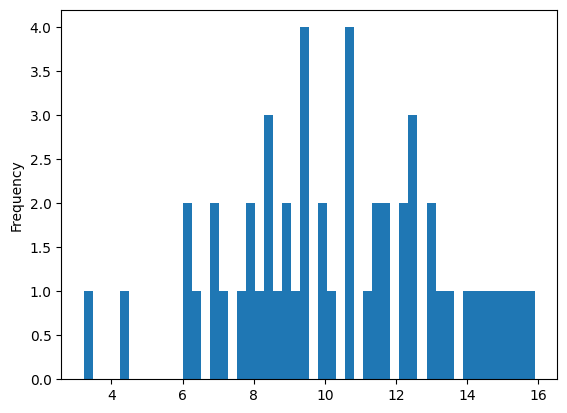

In [45]:
# node degrees
k = [x[1] for x in G.degree(weight='weight')]
k_dS = pd.Series(k)
k_dS.plot(kind='hist', bins=50)
k_dS

In [27]:
a = nx.get_edge_attributes(G, 'weight')

## Load images generated at plot_multiplex

In [8]:
import pickle

In [9]:
path = 'plot_multiplex/FigureObject_age_bracket_multiplex_Compartir.pickle'

In [10]:
pkl = open(path, 'rb')

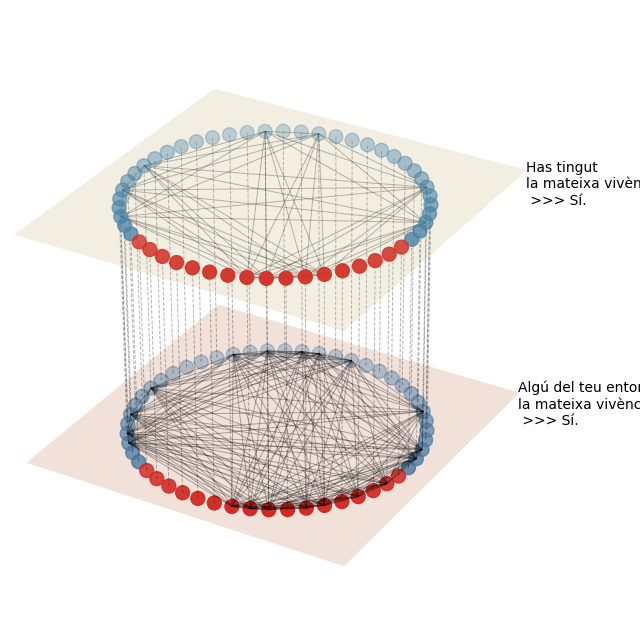

In [11]:
img = pickle.load(pkl)

In [15]:
img.savefig('multiplex_img.png')

In [12]:
from PIL import Image

In [13]:
im = Image.open(img)

AttributeError: 'Figure' object has no attribute 'read'